In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from tensorflow import keras
import matplotlib
import urllib.request
matplotlib.rcParams['axes.unicode_minus']=False




(train_data, train_label), (test_data, test_label) = keras.datasets.fashion_mnist.load_data()

In [3]:
train_data.shape , test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:

train_scaled = train_data.reshape(-1,28,28,1)/255.0
test_scaled =  test_data.reshape(-1,28,28,1)/255.0

In [5]:
train_scaled.shape , test_scaled.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
sub_data, val_data, sub_label, val_label = train_test_split(train_scaled, train_label)

In [7]:
sub_data.shape, val_data.shape

((45000, 28, 28, 1), (15000, 28, 28, 1))

In [8]:

model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3, activation='relu',  padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

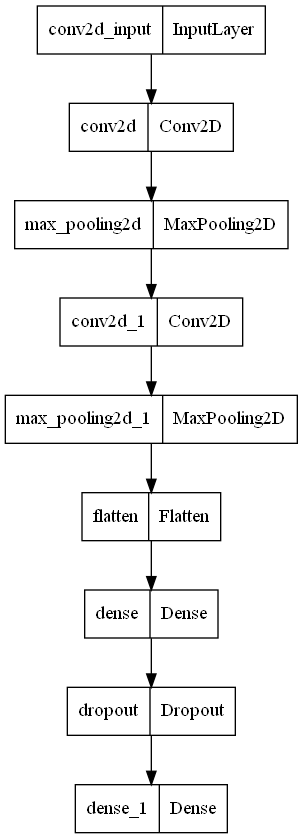

In [9]:
from tensorflow.keras.utils import plot_model
keras.utils.plot_model(model)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')


In [11]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)


In [12]:
history = model.fit(sub_data, sub_label, epochs=20, validation_data=(val_data, val_label), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1407/1407 [==============================] - 18s 12ms/step - loss: 0.5288 - accuracy: 0.8113 - val_loss: 0.3333 - val_accuracy: 0.8820
Epoch 2/20
1407/1407 [==============================] - 17s 12ms/step - loss: 0.3532 - accuracy: 0.8750 - val_loss: 0.3007 - val_accuracy: 0.8917
Epoch 3/20
1407/1407 [==============================] - 17s 12ms/step - loss: 0.3028 - accuracy: 0.8910 - val_loss: 0.2772 - val_accuracy: 0.8995
Epoch 4/20
1407/1407 [==============================] - 17s 12ms/step - loss: 0.2675 - accuracy: 0.9023 - val_loss: 0.2486 - val_accuracy: 0.9125
Epoch 5/20
1407/1407 [==============================] - 17s 12ms/step - loss: 0.2430 - accuracy: 0.9108 - val_loss: 0.2485 - val_accuracy: 0.9122
Epoch 6/20
1407/1407 [==============================] - 17s 12ms/step - loss: 0.2241 - accuracy: 0.9170 - val_loss: 0.2610 - val_accuracy: 0.9076
Epoch 7/20
1407/1407 [==============================] - 17s 12ms/step - loss: 0.2073 - accuracy: 0.9236 - val_loss: 0.2458 -

13
469/469 [==============================] - 2s 4ms/step - loss: 0.2419 - accuracy: 0.9192


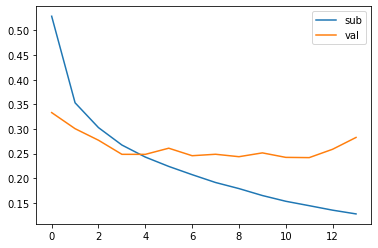

In [13]:
print(early_stopping_cb.stopped_epoch)



score = model.evaluate(val_data, val_label)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['sub','val'])
plt.show()

469/469 [==============================] - 2s 3ms/step - loss: 0.2419 - accuracy: 0.9192


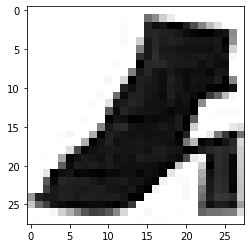

1/1 [==============================] - 0s 74ms/step
[[1.6847222e-11 2.5536715e-19 6.7272167e-16 1.3420455e-19 1.5723130e-17
  9.1687113e-01 2.6944563e-13 3.5839712e-12 2.3359990e-12 8.3128884e-02]]


In [14]:
model.evaluate(val_data, val_label)

plt.imshow(val_data[0].reshape(28, 28), cmap='gray_r')
plt.show()
preds = model.predict(val_data[0:1])
print(preds)

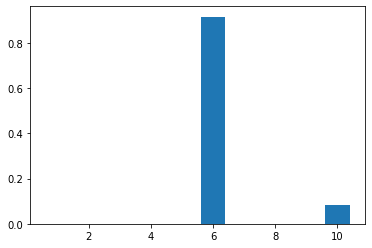

In [15]:
plt.bar(range(1,11),preds[0])
plt.show()

In [16]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클부츠']


In [17]:
classes[np.argmax(preds)]

'샌달'